### Logistic problem
### $$ \min_x \frac{1}{M} \sum_{i=1}^{M}\log[1+\exp{(-b_ia_i^\top x)}]+\frac{\mu}{2}\vert\vert x\vert\vert^2 $$
### where $a_1, a_2, \cdots, a_m\in R^n$, $b_1, b_2, \cdots, b_m\in R$ and $\gamma>0$. We notice that the Lipschitz constant $L=$  

In [1]:
# First we import some useful packages. Don't import any other package.
import numpy as np
import matplotlib.pyplot as plt
import time as clock

In [2]:
from libsvm.svmutil import *

In [3]:
#import modules
import pandas as pd
import numpy as np

#read csv to pandas dataframe
mushrooms = pd.read_csv("mushrooms.csv")

#create dummy variables
mushrooms = pd.get_dummies(mushrooms)

#subset data into dependent and independent variables x,y
LABELS = ['class_e', 'class_p']
FEATURES = [a  for a in mushrooms.columns if a not in LABELS ]
y = mushrooms[LABELS[0]]
x= mushrooms[FEATURES]

mushrooms.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [4]:
A =x.to_numpy()

In [5]:
b = y.to_numpy()
b = b.reshape((len(b),1))

### Initialization of the model

In [6]:
 np.random.seed(0)



In [7]:
mu = 1

In [8]:
x0 = 0*np.random.randn(117,1)

In [9]:
M = len(A)
#L = 2*np.trace(A@A.T)/M+ mu
L = 2*np.trace(A@A.T)/M+ mu
#L = 2*np.max(np.diag(A@A.T)) + mu
stepsize = 1/(2*L)#1/2L
H = 2
Model = {'A':A, 'b':b, 'mu':mu,'x':x0,'Lip':L,'H':2};
options= {'stepsize':stepsize}

### Algorithm

In [10]:
#Load 
from Mathtools import *
from gradNewton import *
from HBF import *
from CubicNewton import *
from CubicSR1 import *
from GradQN import *
from gd import *

In [11]:
L
Model['Lip'] = L

In [12]:
#test
maxiter = 300#300;#500
check = 10;#10
tol = 0.0000000001;

# taping:
xs = [];
rs = [];
fs = [];
ts = [];
cols = [];
legs = [];

nams = [];

# colors for the image
COLSR1 = [(1,0,0,1), (1,0.5,0,1), (1,0,0.5,1), (0,0.5,0.5,1), (0.5,0.5,0,1) ]
COLBFGS =  [(0.3,0.7,0,1), (0.7,0.2,0.3,1), (0,0,0,1), (0.5,0,0.2,1), (0.2,0.2,0.7,1) ]

In [13]:
# turn algorithms to be run on or off
run_Cubic_Newton = 1;
run_grad_Newton = 1;
run_Cubic_SR1 = 1;

run_grad_SR1 = 1; #grad SR1 ad
run_HBF = 1
run_gd = 1
# with open('optlogis.npy', 'rb') as f:
#      opt= np.load(f)
# with open('logisSol.npy', 'rb') as f:
#      x0 = np.load(f)
np.random.seed(1)
Model['x'] = 30*np.random.randn(len(A[0,:]),1)
compute_optimal_value = False;


#TOl
tol = 1e-13
if compute_optimal_value: # optimal solution is compyted using FISTA
    maxiter = 10000;
    check = 100;
    
    run_fista = 1;
    run_grad_SR1_ad = 0; #grad SR1 ad
    run_gd = 0
    
    
    
    

In [14]:
#####################################################################
if run_Cubic_Newton:
    
    print('');
    print('********************************************************');
    print('***Cubic Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0.6,1));
    legs.append('Cubic Newton');
    nams.append('Cubic Newton');


********************************************************
***Cubic Newton **
***********
iter:10, funValue:15864.985523,fun:15864.985523
iter:20, funValue:4736.302597,fun:4736.302597
iter:30, funValue:842.775407,fun:842.775407
iter:40, funValue:41.041478,fun:41.041478
iter:50, funValue:0.529938,fun:0.529938
iter:60, funValue:0.529911,fun:0.529911
iter:70, funValue:0.529911,fun:0.529911
iter:80, funValue:0.529911,fun:0.529911
Tolerence value reached


In [15]:
#####################################################################
if run_grad_Newton:
    
    print('');
    print('********************************************************');
    print('***Grad Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = grad_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0,1));
    legs.append('Grad Newton');
    nams.append('Grad Newton');


********************************************************
***Grad Newton **
***********
iter:10, funValue:16293.795604,fun:16293.795604
iter:20, funValue:5107.288493,fun:5107.288493
iter:30, funValue:1024.314869,fun:1024.314869
iter:40, funValue:77.184972,fun:77.184972
iter:50, funValue:0.667306,fun:0.667306
iter:60, funValue:0.529911,fun:0.529911
iter:70, funValue:0.529911,fun:0.529911
iter:80, funValue:0.529911,fun:0.529911
Tolerence value reached


In [16]:
#####################################################################
if run_Cubic_SR1:
    
    print('');
    print('********************************************************');
    print('***Cubic SR1 **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.8,0.5,0.6,1));
    legs.append('Cubic SR1 PQN');
    nams.append('Cubic SR1 PQN');


********************************************************
***Cubic SR1 **
***********
iter:10, funValue:23383.815077,fun:23383.815077
iter:20, funValue:12963.940269,fun:12963.940269
iter:30, funValue:6498.844730,fun:6498.844730
iter:40, funValue:2826.965227,fun:2826.965227
iter:50, funValue:992.147053,fun:992.147053
iter:60, funValue:242.405120,fun:242.405120
iter:70, funValue:28.769324,fun:28.769324
iter:80, funValue:1.324042,fun:1.324042
iter:90, funValue:0.700340,fun:0.700340
iter:100, funValue:0.530997,fun:0.530997
iter:110, funValue:0.529911,fun:0.529911
iter:120, funValue:0.529911,fun:0.529911
iter:130, funValue:0.529911,fun:0.529911
Tolerence value reached


In [17]:

#####################################################################
if run_grad_SR1:
    
    print('');
    print('********************************************************');
    print('***Gradient reg SR1 ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        
    }

   
    
    output = Grad_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.8,0.1,0,1));
    legs.append('Grad SR1 PQN');
    nams.append('Grad SR1 PQN');


********************************************************
***Gradient reg SR1 ***
***********
*****number of iterations***
1
iter:10, funValue:0.529911,fun:0.529911
*****number of iterations***
11
iter:20, funValue:0.529911,fun:0.529911
Tolerence value reached
num_restart= 2


In [18]:
if run_HBF:
    
    print('');
    print('********************************************************');
    print('***Accelerated ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

   
    
    output = HBF(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.5,0,1));
    legs.append('HBF');
    nams.append('HBF');


********************************************************
***Accelerated ***
***********
iter:10, time:1729090444.322389, tau:0.535898,fun:0.534591
iter:20, time:1729090444.361274, tau:0.535898,fun:0.529911
iter:30, time:1729090444.394406, tau:0.535898,fun:0.529911
iter:40, time:1729090444.429440, tau:0.535898,fun:0.529911
iter:50, time:1729090444.464509, tau:0.535898,fun:0.529911
Tolerence value reached


In [19]:
if run_gd:
    
    print('');
    print('********************************************************');
    print('***Gradient  ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False
    }

   
    
    output = gd(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_obj']);
    cols.append((0.4,0.2,0,1));
    legs.append('GD');
    nams.append('GD');


********************************************************
***Gradient  ***
***********
iter:10, time:1729090445.536113, tau:0.166667,fun:1044.871273
iter:20, time:1729090445.574421, tau:0.166667,fun:27.475291
iter:30, time:1729090445.607412, tau:0.166667,fun:1.216667
iter:40, time:1729090445.641184, tau:0.166667,fun:0.547347
iter:50, time:1729090445.673517, tau:0.166667,fun:0.530355
iter:60, time:1729090445.709512, tau:0.166667,fun:0.529923
iter:70, time:1729090445.743861, tau:0.166667,fun:0.529912
iter:80, time:1729090445.777443, tau:0.166667,fun:0.529911
iter:90, time:1729090445.815312, tau:0.166667,fun:0.529911
iter:100, time:1729090445.847486, tau:0.166667,fun:0.529911
iter:110, time:1729090445.881473, tau:0.166667,fun:0.529911
iter:120, time:1729090445.914559, tau:0.166667,fun:0.529911
iter:130, time:1729090445.949659, tau:0.166667,fun:0.529911
iter:140, time:1729090445.983523, tau:0.166667,fun:0.529911
iter:150, time:1729090446.018003, tau:0.166667,fun:0.529911
iter:160, time:172

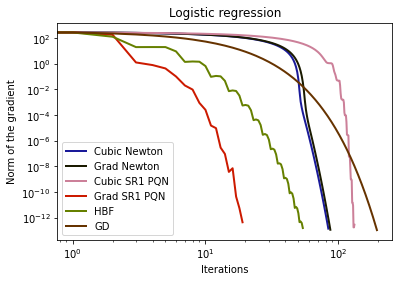

<Figure size 432x288 with 0 Axes>

In [20]:
#nalgs = len(rs);
nalgs = len(rs);

# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    iterations = np.arange(0,len(rs[i])-1,1)

    plt.plot(iterations, rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

#plt.xlabel('seq_time')
plt.xlabel('Iterations')
plt.ylabel('Norm of the gradient');
plt.title('Logistic regression')
plt.savefig('AllAlgorithmLogistic(PQNOct16).pdf')

plt.show();
plt.draw();


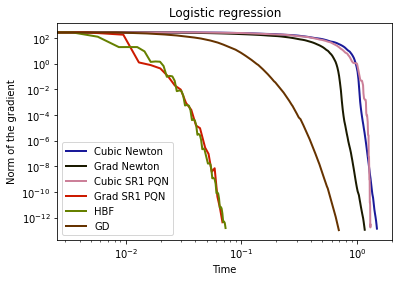

<Figure size 432x288 with 0 Axes>

In [21]:
#nalgs = len(rs);
nalgs = len(rs);
# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    plt.plot(ts[i][0:-1], rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

plt.xlabel('Time')
# plt.xlabel('seq_iter')
plt.ylabel('Norm of the gradient');
plt.title('Logistic regression')
plt.savefig('AllAlgorithmLogistic(PQN)(timeOct16).pdf')

plt.show();
plt.draw();